In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('students_performance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
#checking for any missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [8]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

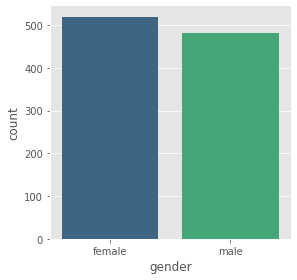

In [9]:
plt.style.use('ggplot')
sns.catplot(x = 'gender', kind = 'count',data = df,  height = 4, palette = 'viridis')

In [10]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

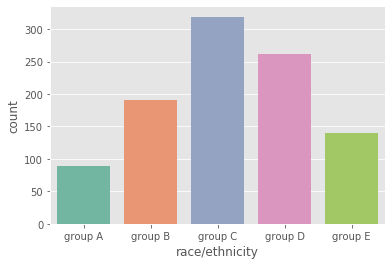

In [11]:
plt.style.use('ggplot')
sns.countplot(x = 'race/ethnicity', palette = 'Set2', data = df,
             order = ['group A', 'group B', 'group C', 'group D', 'group E'])

Text(0.5, 1.0, 'Math score VS Reading Score by Gender')

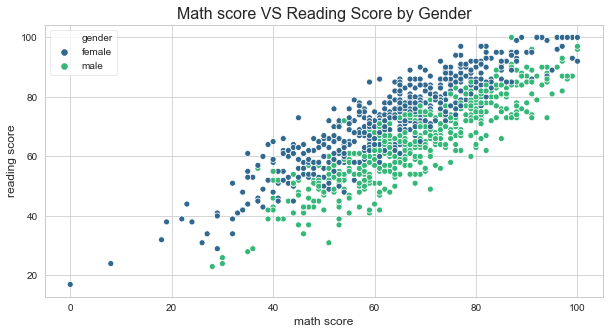

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.scatterplot(x='math score',y='reading score', hue='gender',data=df, palette='viridis')
plt.title('Math score VS Reading Score by Gender', fontsize = 16)

Text(0.5, 1.0, 'Math score VS Reading Score by Gender')

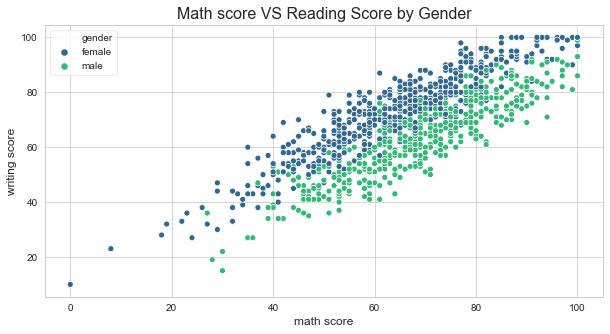

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.scatterplot(x='math score',y='writing score', hue='gender',data=df, palette='viridis')
plt.title('Math score VS Reading Score by Gender', fontsize = 16)


Below correlation matrix will give us the better idea to choose the best correlated and meaningful variables.

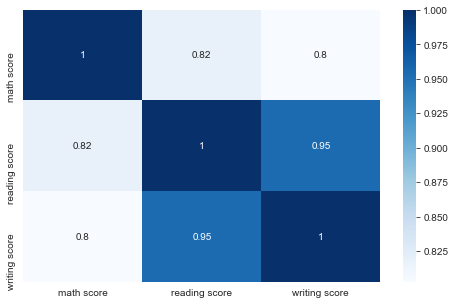

In [13]:
corr_matrix = df.corr()

plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')
plt.show()

We can see that most of the students are good at reading especiallly females.




These below graphs will give us the distribution of the dataset.
>Center of the Data i.e. Median, Mean, Mode.

>Spread(Variability) of the data.

>Skewness of the data

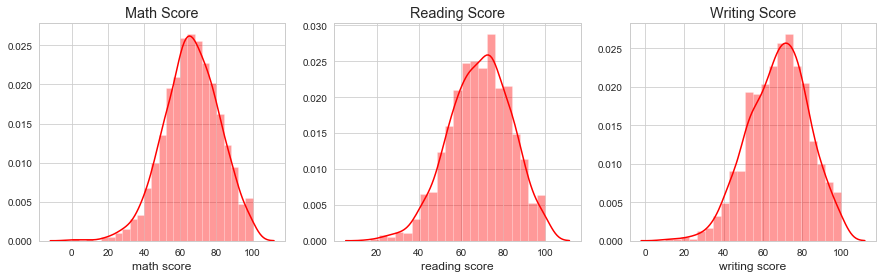

In [14]:
plt.figure(figsize = (15, 4))

plt.subplot(131)
plt.title('Math Score')
sns.distplot(df['math score'], color = 'r')

plt.subplot(132)
plt.title('Reading Score')
sns.distplot(df['reading score'], color = 'r')

plt.subplot(133)
plt.title('Writing Score')
sns.distplot(df['writing score'], color = 'r')

plt.show()

From the above histogram, we can see that the most of the students scores lie between the range of 65-80. The data is distributed normally i.e. Normal Distribution

## Visualizing the data to get a handful of information.

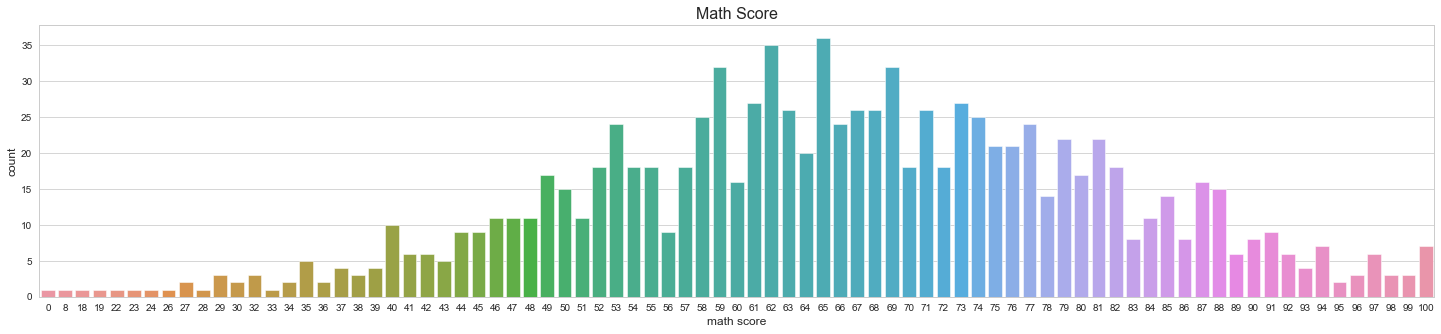

In [15]:
plt.figure(figsize = (25, 5))

sns.countplot(df['math score'])
plt.title('Math Score', fontsize = 16)
plt.show()

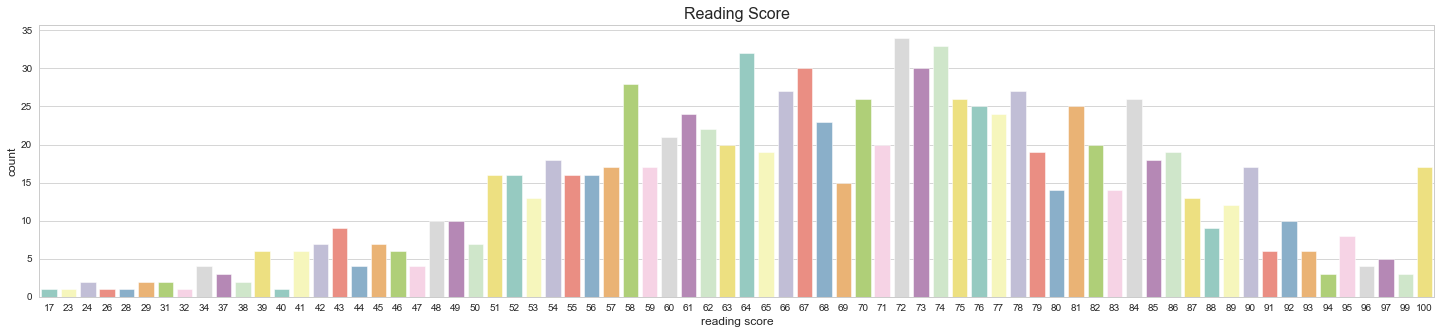

In [16]:
plt.figure(figsize = (25, 5))

sns.countplot(df['reading score'], palette = 'Set3')
plt.title('Reading Score', fontsize = 16)
plt.show()

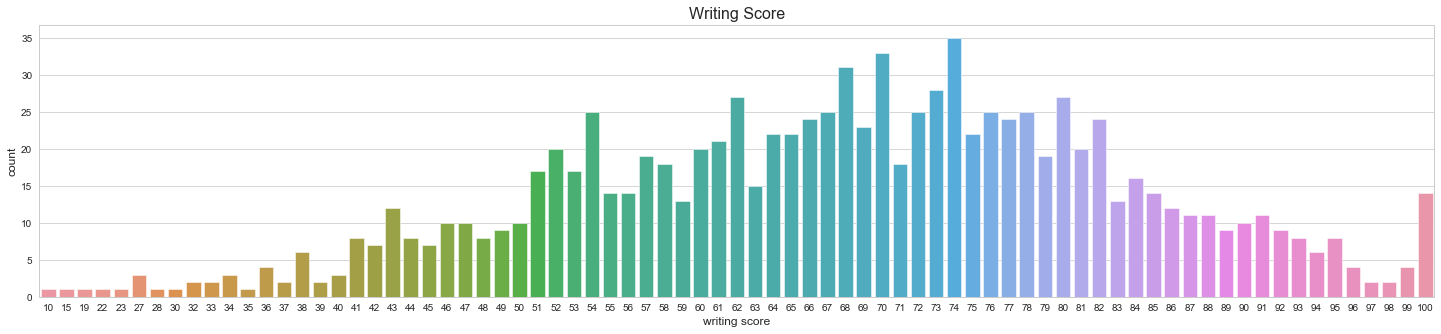

In [17]:
plt.figure(figsize = (25, 5))

sns.countplot(df['writing score'])
plt.title('Writing Score', fontsize = 16)

plt.show()

Let's compare the scores of male and female students

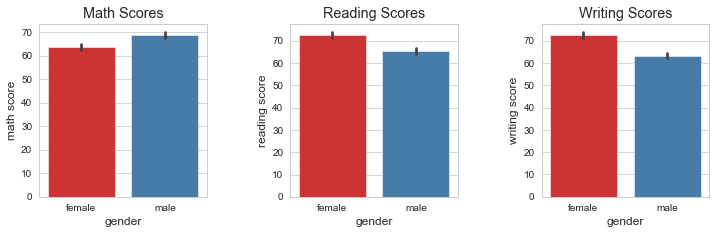

In [18]:
plt.figure(figsize=(12,3))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=df, palette = 'Set1')
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=df, palette = 'Set1')
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=df, palette = 'Set1')
plt.show()

It's clear from the above bar graphs, that male students are better at maths, whereas females outperforms in remaining subjects.

Let's look at the scores of students who have completed the test preparation course

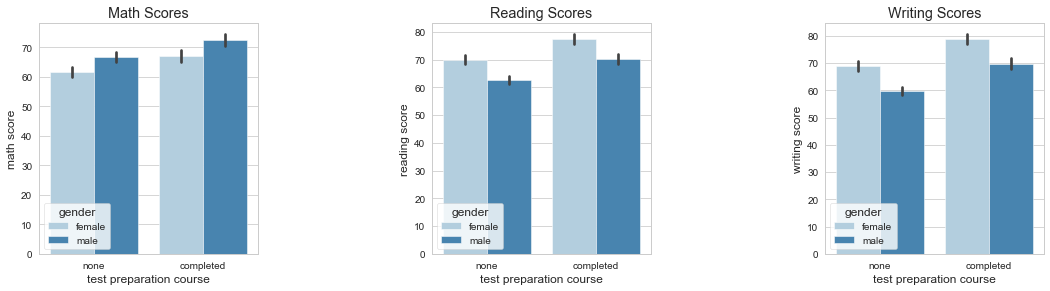

In [19]:
plt.figure(figsize=(18,4))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.8, hspace=0.4)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=df, palette = 'Blues')
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=df, palette = 'Blues')
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=df, palette = 'Blues')
plt.show()



Now observe how the parental education will effect the scores

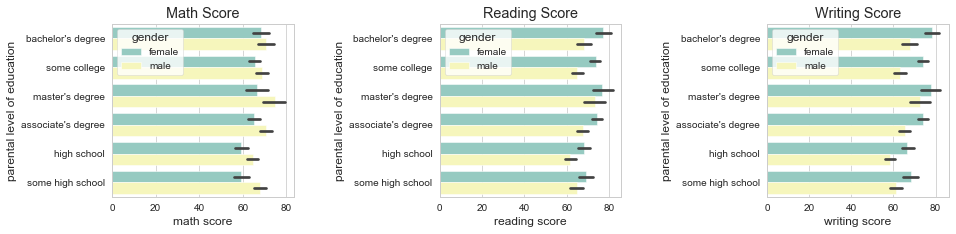

In [20]:
plt.figure(figsize = (15, 3))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.8, hspace = 0.4)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(y = 'parental level of education', x = 'math score', data = df, hue = 'gender', palette = 'Set3', orient = 'h')

plt.subplot(132)
plt.title('Reading Score')
sns.barplot(y = 'parental level of education', x = 'reading score', data = df, hue = 'gender', palette = 'Set3', orient = 'h')

plt.subplot(133)
plt.title('Writing Score')
sns.barplot(y = 'parental level of education', x = 'writing score', data = df, hue = 'gender', palette = 'Set3', orient = 'h')

plt.show()

Above insights shows how the parental education matters.The students, whose parents have <b>master's</b> degree have scored more compared to other.

### Visualising the scores of students who have taken the test preparation course.

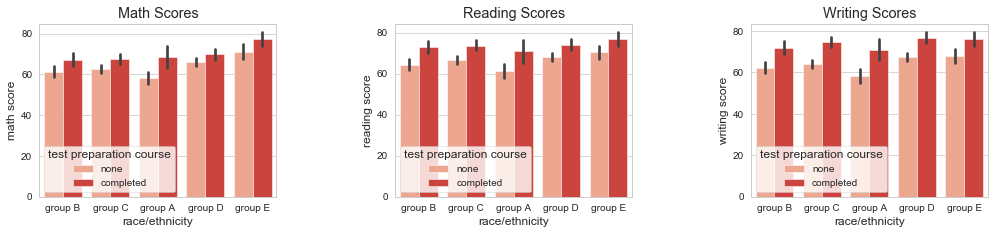

In [21]:
plt.figure(figsize=(17,3))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=df, palette = 'Reds')
plt.subplot(132)
plt.title('Reading Scores')

sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=df, palette = 'Reds')
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=df, palette = "Reds")

plt.show()

Above bargraphs shows that the students from 'group E' who have completed the test preparation course have scored better.